# Task By Dikshani Kumbhare


# Problem Statement
Predicting air quality is a complex task due to the dynamic nature, volatility, and high variability in time and space of pollutants and particulates. At the same time, being able to model, predict, and monitor air quality is becoming more and more relevant, especially in urban areas, due to the observed critical impact of air pollution on citizens’ health and the environment. The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Predict the quality of air on the basis of giving features using different Machine Learning techniques.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:

df = pd.read_excel (r'C:\Users\Manoj\Desktop\internship\task 5\AirQuality1.xlsx')


df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  Unnamed: 15  Unnamed: 16  
0  13.60  48.875001  0.757754          NaN          NaN  
1  13.30  47.700000  0.725487          NaN          NaN  
2  11.90  53.975000  0.750239          NaN          NaN  
3  11.00  60.000000  0.786713          NaN          NaN  
4  11.15  59.575001  0.788794          NaN          NaN

In [3]:
df.shape


(9357, 17)

In [4]:
df.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.869652  -159.090093     1.865576     894.475963   
std      77.657170   329.817015   139.789093    41.380154     342.315902   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.004958     711.000000   
50%       1.500000  1052.500000  -200.000000     7.886653     894.500000   
75%       2.600000  1221.250000  -200.000000    13.636091    1104.750000   
max      11.900000  2039.750000  1189.000000    63.741476    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.604200    794.872333    58.135898   1391.363266   974.951534   
std     257.424561    321.977031   126.931428    467.192382   456.922728   
min    -200.000000   -200.000000  -200.000000   -200.000000  -200.000000   
25%      50.000000    637.000000    53.000000   1184.750000   699.750000   
50%     141.000000    794.250000    96.000000   1445.500000   942.000000   
75%     284.200000    960.250000   133.000000   1662.000000  1255.250000   
max    1479.000000   2682.750000   339.700000   2775.000000  2522.750000   

                 T           RH           AH  Unnamed: 15  Unnamed: 16  
count  9357.000000  9357.000000  9357.000000          0.0          0.0  
mean      9.776600    39.483611    -6.837604          NaN          NaN  
std      43.203438    51.215645    38.976670          NaN          NaN  
min    -200.000000  -200.000000  -200.000000          NaN          NaN  
25%      10.950000    34.050000     0.692275          NaN          NaN  
50%      17.200000    48.550000     0.976823          NaN          NaN  
75%      24.075000    61.875000     1.296223          NaN          NaN  
max      44.600000    88.725000     2.231036          NaN          NaN

In [6]:
df.cov()

CO(GT)    PT08.S1(CO)      NMHC(GT)      C6H6(GT)  \
CO(GT)          6030.636106    1060.744522   1393.332189   -100.829806   
PT08.S1(CO)     1060.744522  108779.263095   7838.244971  11636.983172   
NMHC(GT)        1393.332189    7838.244971  19540.990493    215.928922   
C6H6(GT)        -100.829806   11636.983172    215.928922   1712.317143   
PT08.S2(NMHC)    795.887142  105348.642531   5268.378927  10870.293778   
NOx(GT)        10524.196140   23605.485496   -158.798542    -12.388334   
PT08.S3(NOx)   -2249.858999    9231.526729   2197.884018   6823.669380   
NO2(GT)         6615.513525    6449.496619   1833.711090    -57.626844   
PT08.S4(NO2)   -2674.643250  130224.864304  10624.983387  14975.898624   
PT08.S5(O3)     2849.864553  134490.852519   6463.241349  12125.508332   
T               -231.337028   10755.400483     -0.045764   1736.581567   
RH              -191.825662   12590.187292     59.336471   1960.506177   
AH              -138.907405    9832.477456     68.106991   1587.951066   
Unnamed: 15             NaN            NaN           NaN           NaN   
Unnamed: 16             NaN            NaN           NaN           NaN   

               PT08.S2(NMHC)       NOx(GT)   PT08.S3(NOx)       NO2(GT)  \
CO(GT)            795.887142  10524.196140   -2249.858999   6615.513525   
PT08.S1(CO)    105348.642531  23605.485496    9231.526729   6449.496619   
NMHC(GT)         5268.378927   -158.798542    2197.884018   1833.711090   
C6H6(GT)        10870.293778    -12.388334    6823.669380    -57.626844   
PT08.S2(NMHC)  117180.176653  29197.040780   -8128.383076   7672.038523   
NOx(GT)         29197.040780  66267.404793  -36144.633912  26700.189663   
PT08.S3(NOx)    -8128.383076 -36144.633912  103669.208719 -10471.352015   
NO2(GT)          7672.038523  26700.189663  -10471.352015  16111.587462   
PT08.S4(NO2)   139898.189801   4279.038303   18452.975310  -1310.114634   
PT08.S5(O3)    142320.631583  54331.962776  -30738.170129  14700.677779   
T                9893.759122  -1539.871579    8180.231519   -461.108747   
RH              10269.771518   -698.868010    9457.382552   -528.519322   
AH               8626.281985   -961.621998    7800.530028   -298.935168   
Unnamed: 15              NaN           NaN            NaN           NaN   
Unnamed: 16              NaN           NaN            NaN           NaN   

                PT08.S4(NO2)    PT08.S5(O3)             T            RH  \
CO(GT)          -2674.643250    2849.864553   -231.337028   -191.825662   
PT08.S1(CO)    130224.864304  134490.852519  10755.400483  12590.187292   
NMHC(GT)        10624.983387    6463.241349     -0.045764     59.336471   
C6H6(GT)        14975.898624   12125.508332   1736.581567   1960.506177   
PT08.S2(NMHC)  139898.189801  142320.631583   9893.759122  10269.771518   
NOx(GT)          4279.038303   54331.962776  -1539.871579   -698.868010   
PT08.S3(NOx)    18452.975310  -30738.170129   8180.231519   9457.382552   
NO2(GT)         -1310.114634   14700.677779   -461.108747   -528.519322   
PT08.S4(NO2)   218268.721729  154482.429974  15240.226052  15330.039893   
PT08.S5(O3)    154482.429974  208778.379165   9942.548326  12284.000781   
T               15240.226052    9942.548326   1866.537024   1960.245563   
RH              15330.039893   12284.000781   1960.245563   2623.042273   
AH              12599.021778    9250.726027   1651.927725   1884.421580   
Unnamed: 15              NaN            NaN           NaN           NaN   
Unnamed: 16              NaN            NaN           NaN           NaN   

                         AH  Unnamed: 15  Unnamed: 16  
CO(GT)          -138.907405          NaN          NaN  
PT08.S1(CO)     9832.477456          NaN          NaN  
NMHC(GT)          68.106991          NaN          NaN  
C6H6(GT)        1587.951066          NaN          NaN  
PT08.S2(NMHC)   8626.281985          NaN          NaN  
NOx(GT)         -961.621998          NaN          NaN  
PT08.S3(NOx)    7800.530028          NaN  

In [7]:
df.corr()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
CO(GT)         1.000000     0.041415  0.128351 -0.031377       0.029939   
PT08.S1(CO)    0.041415     1.000000  0.170009  0.852659       0.933101   
NMHC(GT)       0.128351     0.170009  1.000000  0.037329       0.110097   
C6H6(GT)      -0.031377     0.852659  0.037329  1.000000       0.767401   
PT08.S2(NMHC)  0.029939     0.933101  0.110097  0.767401       1.000000   
NOx(GT)        0.526450     0.278029 -0.004413 -0.001163       0.331331   
PT08.S3(NOx)  -0.089981     0.086931  0.048832  0.512154      -0.073748   
NO2(GT)        0.671140     0.154058  0.103345 -0.010971       0.176569   
PT08.S4(NO2)  -0.073721     0.845133  0.162689  0.774649       0.874761   
PT08.S5(O3)    0.080316     0.892436  0.101189  0.641306       0.909909   
T             -0.068952     0.754806 -0.000008  0.971370       0.668984   
RH            -0.048231     0.745344  0.008288  0.925068       0.585775   
AH            -0.045892     0.764866  0.012500  0.984556       0.646535   
Unnamed: 15         NaN          NaN       NaN       NaN            NaN   
Unnamed: 16         NaN          NaN       NaN       NaN            NaN   

                NOx(GT)  PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
CO(GT)         0.526450     -0.089981  0.671140     -0.073721     0.080316   
PT08.S1(CO)    0.278029      0.086931  0.154058      0.845133     0.892436   
NMHC(GT)      -0.004413      0.048832  0.103345      0.162689     0.101189   
C6H6(GT)      -0.001163      0.512154 -0.010971      0.774649     0.641306   
PT08.S2(NMHC)  0.331331     -0.073748  0.176569      0.874761     0.909909   
NOx(GT)        1.000000     -0.436083  0.817138      0.035580     0.461916   
PT08.S3(NOx)  -0.436083      1.000000 -0.256217      0.122672    -0.208935   
NO2(GT)        0.817138     -0.256217  1.000000     -0.022092     0.253469   
PT08.S4(NO2)   0.035580      0.122672 -0.022092      1.000000     0.723670   
PT08.S5(O3)    0.461916     -0.208935  0.253469      0.723670     1.000000   
T             -0.138457      0.588061 -0.084084      0.755053     0.503659   
RH            -0.053008      0.573513 -0.081300      0.640685     0.524922   
AH            -0.095841      0.621576 -0.060423      0.691889     0.519432   
Unnamed: 15         NaN           NaN       NaN           NaN          NaN   
Unnamed: 16         NaN           NaN       NaN           NaN          NaN   

                      T        RH        AH  Unnamed: 15  Unnamed: 16  
CO(GT)        -0.068952 -0.048231 -0.045892          NaN          NaN  
PT08.S1(CO)    0.754806  0.745344  0.764866          NaN          NaN  
NMHC(GT)      -0.000008  0.008288  0.012500          NaN          NaN  
C6H6(GT)       0.971370  0.925068  0.984556          NaN          NaN  
PT08.S2(NMHC)  0.668984  0.585775  0.646535          NaN          NaN  
NOx(GT)       -0.138457 -0.053008 -0.095841          NaN          NaN  
PT08.S3(NOx)   0.588061  0.573513  0.621576          NaN          NaN  
NO2(GT)       -0.084084 -0.081300 -0.060423          NaN          NaN  
PT08.S4(NO2)   0.755053  0.640685  0.691889          NaN          NaN  
PT08.S5(O3)    0.503659  0.524922  0.519432          NaN          NaN  
T              1.000000  0.885910  0.980998          NaN          NaN  
RH             0.885910  1.000000  0.943997          NaN          NaN  
AH             0.980998  0.943997  1.000000          NaN          NaN  
Unnamed: 15         NaN       NaN       NaN          NaN          NaN  
Unnamed: 16         NaN       NaN       NaN          NaN          NaN

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
 15  Unnamed: 15    0 non-

In [9]:
#missing value check
df.isnull().sum()

Date                0
Time                0
CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)            0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
Unnamed: 15      9357
Unnamed: 16      9357
dtype: int64

In [10]:
dfclean=df.dropna()
dfclean.isnull().sum()

Date             0.0
Time             0.0
CO(GT)           0.0
PT08.S1(CO)      0.0
NMHC(GT)         0.0
C6H6(GT)         0.0
PT08.S2(NMHC)    0.0
NOx(GT)          0.0
PT08.S3(NOx)     0.0
NO2(GT)          0.0
PT08.S4(NO2)     0.0
PT08.S5(O3)      0.0
T                0.0
RH               0.0
AH               0.0
Unnamed: 15      0.0
Unnamed: 16      0.0
dtype: float64

In [12]:
df['CO(GT)'].value_counts()

-200.0    1683
 1.0       305
 1.4       279
 1.6       275
 1.5       273
          ... 
 11.9        1
 9.3         1
 7.0         1
 11.5        1
 9.9         1
Name: CO(GT), Length: 97, dtype: int64

In [13]:
df['NMHC(GT)'].value_counts()

-200    8443
 66       14
 40        9
 29        9
 93        8
        ... 
 259       1
 307       1
 339       1
 347       1
 783       1
Name: NMHC(GT), Length: 430, dtype: int64

In [15]:
df['C6H6(GT)'].value_counts()

-200.000000    366
 6.849892       13
 4.045717        9
 10.184263       9
 6.810175        9
              ... 
 26.615756       1
 25.600774       1
 8.209144        1
 27.462413       1
 6.477490        1
Name: C6H6(GT), Length: 3773, dtype: int64

In [16]:
df['NOx(GT)'].value_counts()

-200.0     1639
 65.0        37
 89.0        36
 41.0        36
 57.0        32
           ... 
 209.2        1
 322.7        1
 213.9        1
 253.3        1
 1159.0       1
Name: NOx(GT), Length: 2467, dtype: int64

In [17]:
df['NO2(GT)'].value_counts()

-200.0    1642
 97.0       68
 95.0       66
 101.0      65
 68.0       63
          ... 
 283.2       1
 19.4        1
 157.2       1
 152.7       1
 190.4       1
Name: NO2(GT), Length: 1420, dtype: int64

In [18]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [103]:
l=[]
for i in range(len(df.columns)):
    f=df.columns[i]
    count=0
    for j in range(len(df[f])):
        if df[f][j]==-200:
            count+=1
    l.append((f,count))
print("value from each column that needs to be replaced with avg \n ",l)


value from each column that needs to be replaced with avg 
  [('Date', 0), ('Time', 0), ('CO(GT)', 1683), ('PT08.S1(CO)', 366), ('NMHC(GT)', 8443), ('C6H6(GT)', 366), ('PT08.S2(NMHC)', 366), ('NOx(GT)', 1639), ('PT08.S3(NOx)', 366), ('NO2(GT)', 1642), ('PT08.S4(NO2)', 366), ('PT08.S5(O3)', 366), ('T', 366), ('RH', 366), ('AH', 366), ('Unnamed: 15', 0), ('Unnamed: 16', 0)]


In [105]:
num=df._get_numeric_data()
num[num<0]=0
df

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0    2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1    2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2    2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3    2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4    2004-03-10  22:00:00     1.6      1272.25        51   6.518224   
...         ...       ...     ...          ...       ...        ...   
9352 2005-04-04  10:00:00     3.1      1314.25         0  13.529605   
9353 2005-04-04  11:00:00     2.4      1162.50         0  11.355157   
9354 2005-04-04  12:00:00     2.4      1142.00         0  12.374538   
9355 2005-04-04  13:00:00     2.1      1002.50         0   9.547187   
9356 2005-04-04  14:00:00     2.2      1070.75         0  11.932060   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0           1045.50    166.0       1056.25    113.0       1692.00   
1            954.75    103.0       1173.75     92.0       1558.75   
2            939.25    131.0       1140.00    114.0       1554.50   
3            948.25    172.0       1092.00    122.0       1583.75   
4            835.50    131.0       1205.00    116.0       1490.00   
...             ...      ...           ...      ...           ...   
9352        1101.25    471.7        538.50    189.8       1374.25   
9353        1027.00    353.3        603.75    179.2       1263.50   
9354        1062.50    293.0        603.25    174.7       1240.75   
9355         960.50    234.5        701.50    155.7       1041.00   
9356        1047.25    265.2        654.00    167.7       1128.50   

      PT08.S5(O3)       T         RH        AH  Unnamed: 15  Unnamed: 16  
0         1267.50  13.600  48.875001  0.757754          NaN          NaN  
1          972.25  13.300  47.700000  0.725487          NaN          NaN  
2         1074.00  11.900  53.975000  0.750239          NaN          NaN  
3         1203.25  11.000  60.000000  0.786713          NaN          NaN  
4         1110.00  11.150  59.575001  0.788794          NaN          NaN  
...           ...     ...        ...       ...          ...          ...  
9352      1728.50  21.850  29.250000  0.756824          NaN          NaN  
9353      1269.00  24.325  23.725000  0.711864          NaN          NaN  
9354      1092.00  26.900  18.350000  0.640649          NaN          NaN  
9355       769.75  28.325  13.550000  0.513866          NaN          NaN  
9356       816.00  28.500  13.125000  0.502804          NaN          NaN  

[9357 rows x 17 columns]

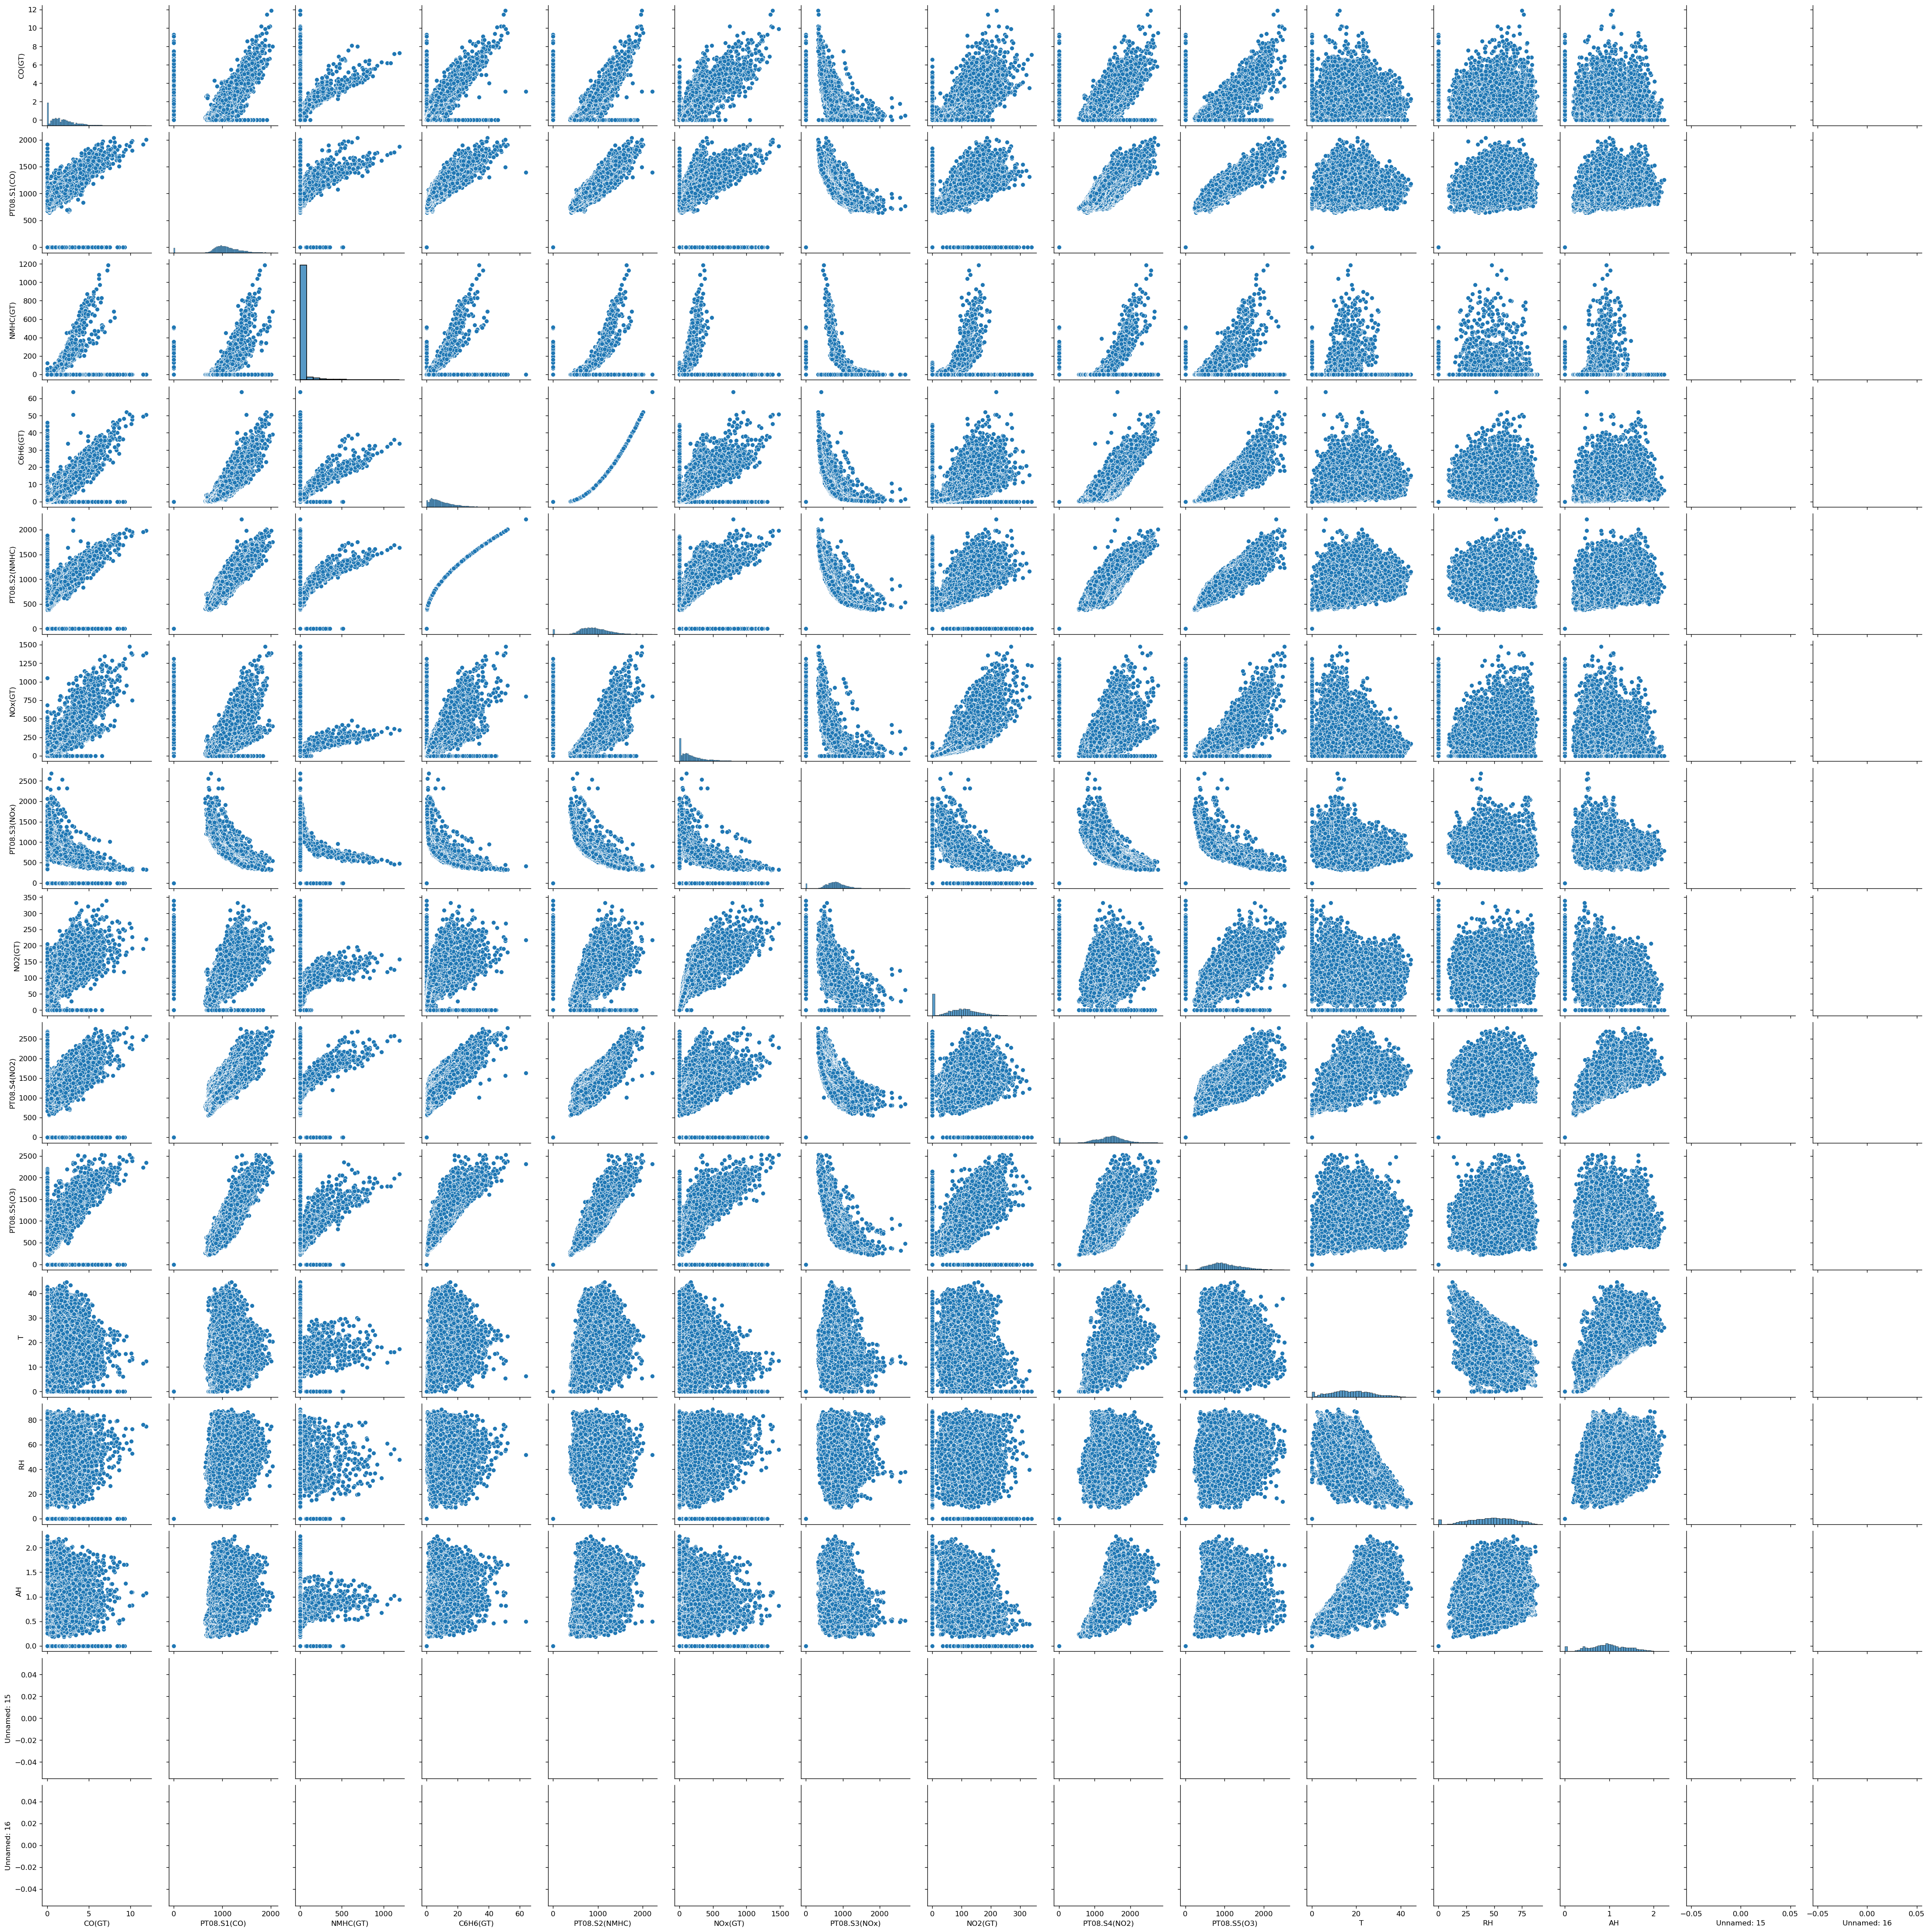

In [108]:
sns.pairplot(df)

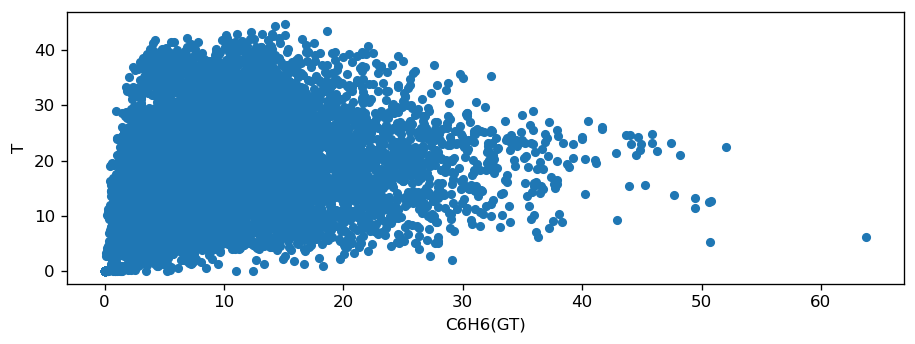

In [109]:
#scatter plot
df.plot(kind='scatter',x='C6H6(GT)',y='T')
plt.show()

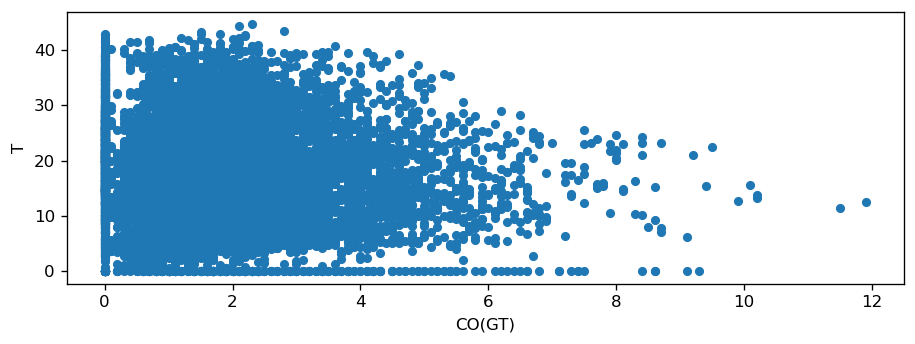

In [110]:
#scatter plot
df.plot(kind='scatter',x='CO(GT)',y='T')
plt.show()

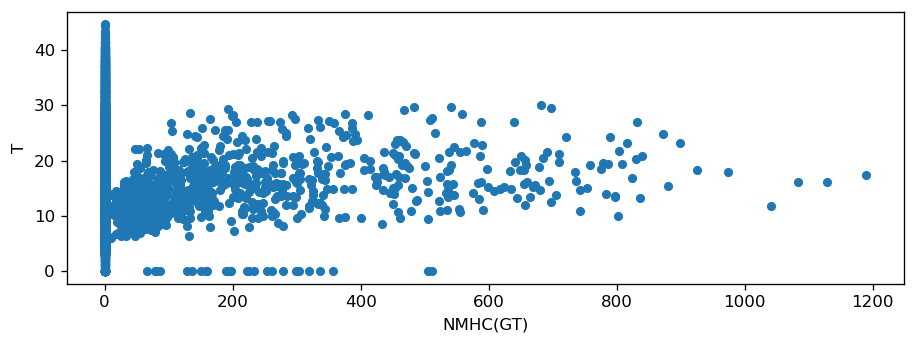

In [111]:
#scatter plot
df.plot(kind='scatter',x='NMHC(GT)',y='T')
plt.show()

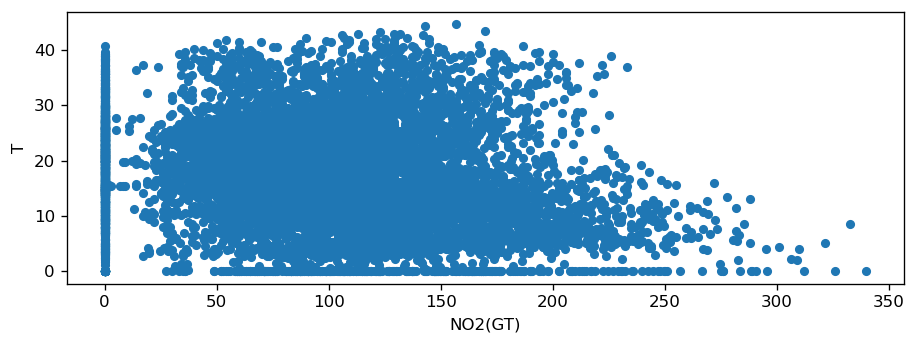

In [112]:

#scatter plot
df.plot(kind='scatter',x='NO2(GT)',y='T')
plt.show()

<AxesSubplot:ylabel='Frequency'>

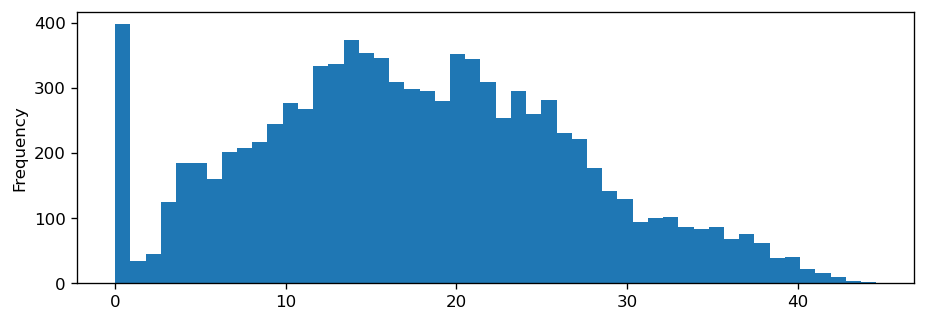

In [113]:
#histogram
df['T'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

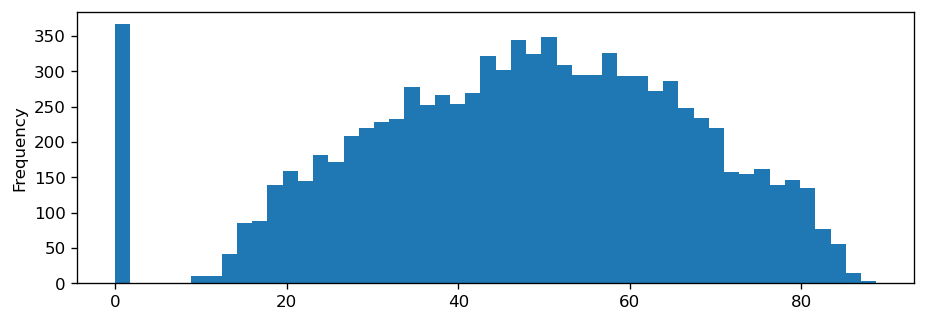

In [114]:
df['RH'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

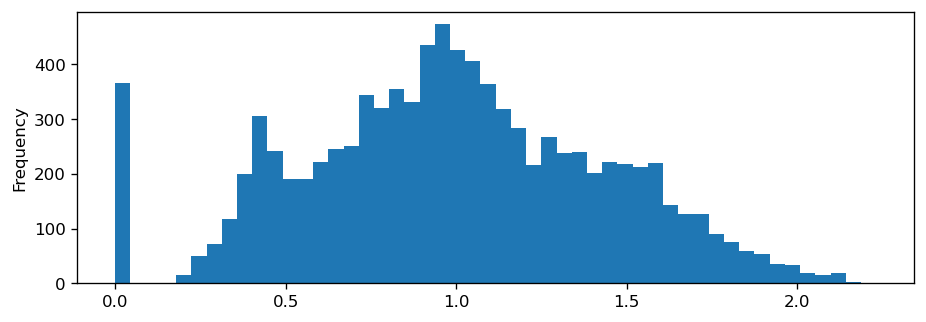

In [115]:
df['AH'].plot.hist(bins=50)

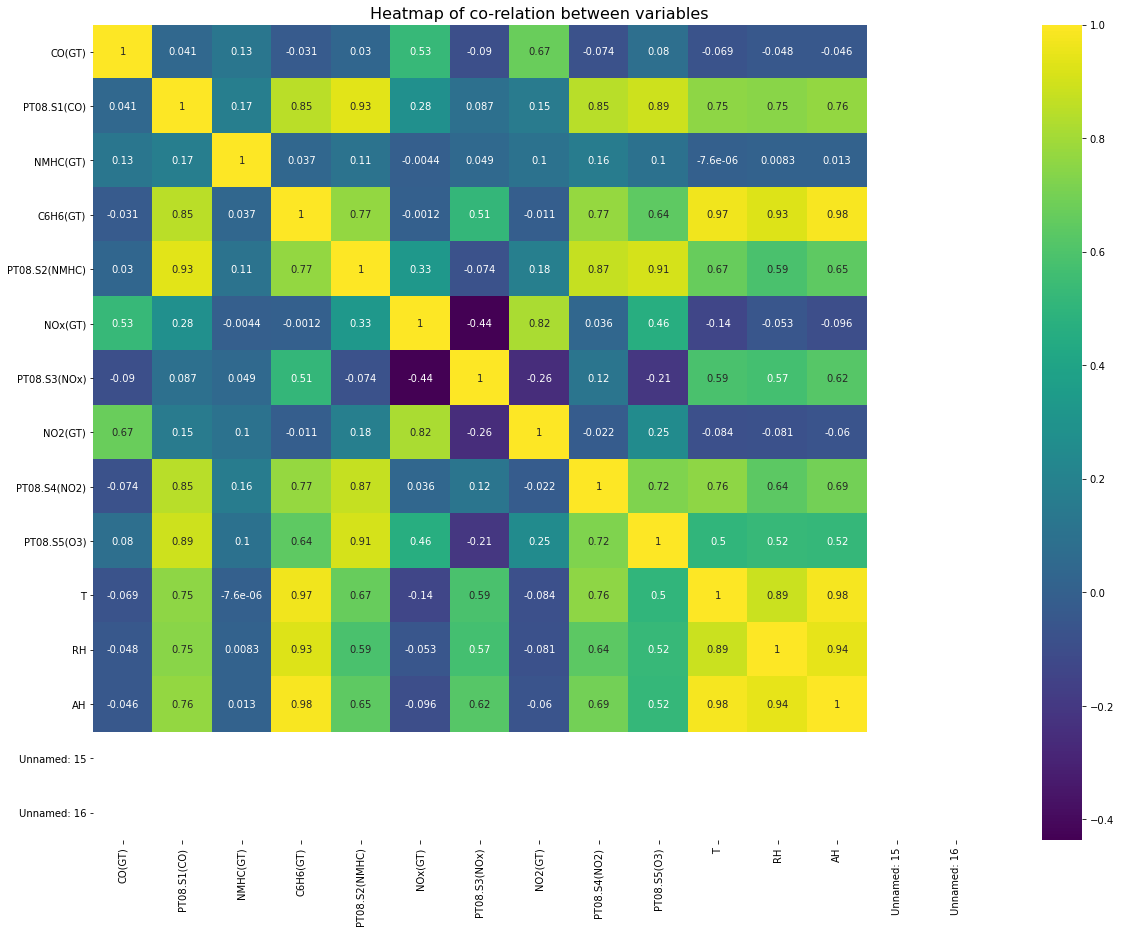

In [8]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

# model

In [4]:
from sklearn.preprocessing import StandardScaler        
from sklearn.model_selection import train_test_split      
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor          
from sklearn.model_selection import GridSearchCV  
from sklearn.ensemble import RandomForestRegressor  

In [5]:
feature=df
feature=feature.drop('Date',axis=1)
feature=feature.drop('Time',axis=1)
feature=feature.drop('Unnamed: 15',axis=1)
feature=feature.drop('Unnamed: 16',axis=1)
feature=feature.drop('T',axis=1)


In [6]:
feature.head()

CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.6      1360.00       150  11.881723        1045.50    166.0   
1     2.0      1292.25       112   9.397165         954.75    103.0   
2     2.2      1402.00        88   8.997817         939.25    131.0   
3     2.2      1375.50        80   9.228796         948.25    172.0   
4     1.6      1272.25        51   6.518224         835.50    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         RH        AH  
0       1056.25    113.0       1692.00      1267.50  48.875001  0.757754  
1       1173.75     92.0       1558.75       972.25  47.700000  0.725487  
2       1140.00    114.0       1554.50      1074.00  53.975000  0.750239  
3       1092.00    122.0       1583.75      1203.25  60.000000  0.786713  
4       1205.00    116.0       1490.00      1110.00  59.575001  0.788794

In [7]:
#label
label=df['T']

In [8]:
label.head()

0    13.60
1    13.30
2    11.90
3    11.00
4    11.15
Name: T, dtype: float64

In [9]:
X_train, X_test, y_train, y_test=train_test_split(feature,label,test_size=0.3)


In [10]:
print(X_train.shape,y_train.shape)

(6549, 12) (6549,)


In [11]:
print(X_test.shape,y_test.shape)

(2808, 12) (2808,)


# Linear Regression

In [52]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [53]:
lr.score(X_test,y_test)

0.9953956826548856

In [54]:
y_pred=lr.predict(X_test)

In [56]:
MSE = np.square(np.subtract(y_test,y_pred)).mean()
MSE

9.457605215168943

In [57]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))      
print('RMSE of model:',rmse)

RMSE of model: 3.0753219693503566


# Decision Tree

In [47]:
Dr=DecisionTreeRegressor()
Dr.fit(X_train,y_train)  

DecisionTreeRegressor()

In [48]:
Dr.score(X_test,y_test)

0.9998639412706473

In [49]:
y_pred=Dr.predict(X_test)


In [50]:
MSE = np.square(np.subtract(y_test,y_pred)).mean()
MSE

0.27947459999926005

In [51]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))      
print('RMSE of model:',rmse)

RMSE of model: 0.5286535727669495


# Random Forest Model

In [59]:
Rf=RandomForestRegressor()
Rf.fit(X_train,y_train) 

RandomForestRegressor()

In [60]:
Rf.score(X_test,y_test)

0.9999667367877656

In [61]:
y_pred=Rf.predict(X_test) 

In [62]:
MSE = np.square(np.subtract(y_test,y_pred)).mean()
MSE

0.06832507534152192

In [63]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))      
print('RMSE of model:',rmse)

RMSE of model: 0.2613906565689025


# ARIMA MODEL

ARIMA Models
ARIMA, abbreviated for 'Auto Regressive Integrated Moving Average', is a class of models that 'demonstrates' a given time series based on its previous values: its lags and the lagged errors in forecasting, so that equation can be utilized in order to forecast future values.

We can model any Time Series that are non-seasons exhibiting patterns and not a random white noise with ARIMA models.

There are three terms characterizing An ARIMA model:

p, q, and d

where,

p = the order of the AR term
q = the order of the MA term
d = the number of differences required to make the time series stationary
If a Time Series has seasonal patterns, we have to insert seasonal periods, and it becomes SARIMA, short for 'Seasonal ARIMA'.


In [9]:
from statsmodels.tsa.stattools import adfuller  
from numpy import log  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf   
from statsmodels.tsa.arima_model import ARIMA  
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [14]:
res = adfuller( df.Date)  
print('Augmented Dickey-Fuller Statistic: %f' % res[0])  
print('p-value: %f' % res[1])  

Augmented Dickey-Fuller Statistic: -0.851979
p-value: 0.803375


The Augmented Dickey-Fuller (ADF) test's null hypothesis is that the time series is not stationary. Thus, if the ADF test's p-value is less than the significance level (0.05), then we will reject the null hypothesis and infer that the time series is definitely stationary. As we can observe, the p-value is more significant than the level of significance. Therefore, we can difference the series and check the plot of autocorrelation 

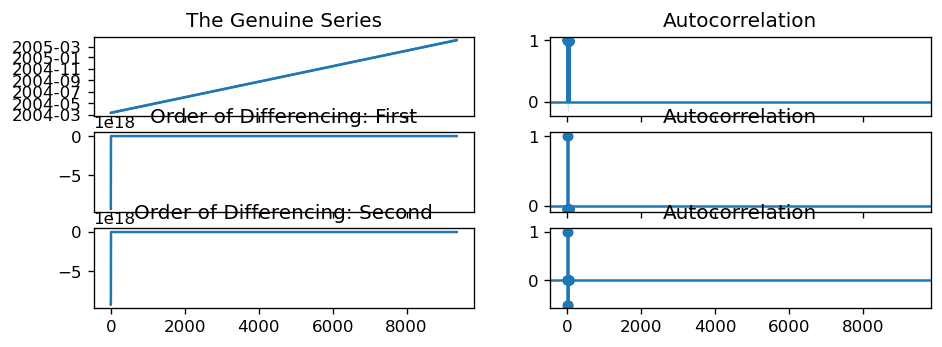

In [25]:

plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})  

# The Genuine Series  
fig, axes = plt.subplots(3, 2, sharex = True)  
axes[0, 0].plot(df.Date); axes[0, 0].set_title('The Genuine Series')  
plot_acf(df.Date, ax = axes[0, 1])  
  

# Order of Differencing: First  
axes[1, 0].plot(df.Date.diff()); axes[1, 0].set_title('Order of Differencing: First')  
plot_acf(df.Date.diff().dropna(), ax = axes[1, 1])  
 

# Order of Differencing: Second  
axes[2, 0].plot(df.Date.diff().diff()); axes[2, 0].set_title('Order of Differencing: Second')  
plot_acf(df.Date.diff().diff().dropna(), ax = axes[2, 1]) 
plt.show()  

We have plotted the original series graph, first-order differencing, and second-order differencing along with their autocorrelation graphs. As we can observe, the time series has reached stationarity with two differencing orders. However, when we have a look at the plot of autocorrelation for the Second order of differencing, the lag going into the far negative zone pretty faster, indicating the series might have been over differenced.

Hence, we will tentatively be fixing the differencing order because the series is not properly stationary, or we can say that the series has weak stationarity.

C:\Users\Manoj\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


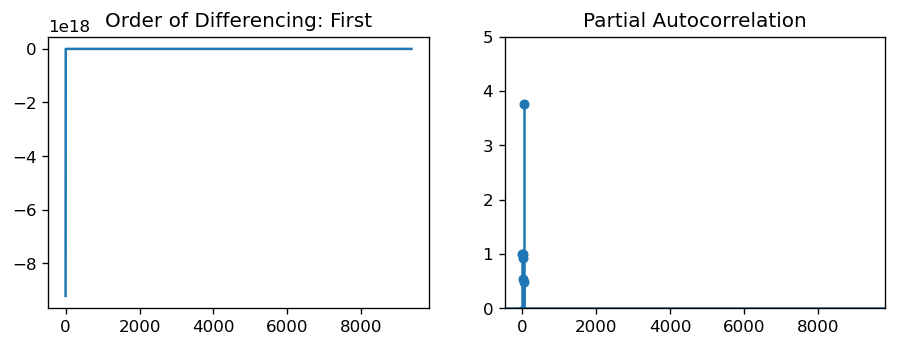

In [24]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})  
  
  
fig, axes = plt.subplots(1, 2, sharex = True)  
axes[0].plot(df.Date.diff()); axes[0].set_title('Order of Differencing: First')  
axes[1].set(ylim = (0,5))  
plot_pacf(df.Date.diff().dropna(), ax = axes[1])  
  
plt.show()  

We have then plotted the graphs to represent the First Order Differencing and its partial autocorrelation.

As a result, we can observe that the PACF lag 1 is pretty significant above the line of significance. Lag 2 also appears to be substantial, entirely maintaining to cross the limit of significance (blue region). However, we will be conservative and fix the p as one tentatively.

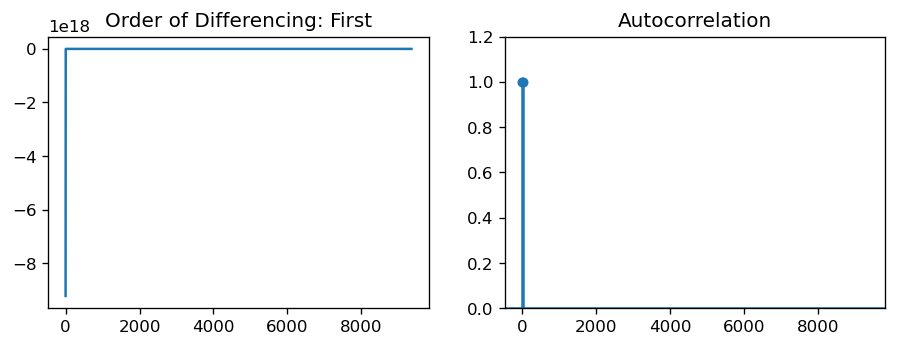

In [27]:
fig, axes = plt.subplots(1, 2, sharex = True)  
axes[0].plot(df.Date.diff()); axes[0].set_title('Order of Differencing: First')  
axes[1].set(ylim = (0, 1.2))  
plot_acf(df.Date.diff().dropna(), ax = axes[1])  
  
plt.show()  


In [31]:


  
# Creating ARIMA model  
mymodel = ARIMA(df.Date, order = (0, 0, 1))  
modelfit = mymodel.fit(disp = 0)  
print(modelfit.summary())  

                               ARMA Model Results                               
Dep. Variable:                   Date   No. Observations:                   9357
Model:                     ARMA(0, 1)   Log Likelihood               -351302.794
Method:                       css-mle   S.D. of innovations 4886299330814253.000
Date:                Thu, 30 Dec 2021   AIC                           702611.587
Time:                        12:46:41   BIC                           702633.019
Sample:                             0   HQIC                          702618.866
                                                                                
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.096e+18   1.01e+14   1.09e+04      0.000     1.1e+18     1.1e+18
ma.L1.Date     0.9936      0.001   1452.566      0.000       0.992       0.995
                                    

In [34]:
# Creating ARIMA model  
mymodel = ARIMA(df.Date, order = (1, 1, 0))  
modelfit = mymodel.fit(disp = 0)  
print(modelfit.summary())  

                             ARIMA Model Results                              
Dep. Variable:                 D.Date   No. Observations:                 9356
Model:                 ARIMA(1, 1, 0)   Log Likelihood             -298436.734
Method:                       css-mle   S.D. of innovations 17252175464167.842
Date:                Thu, 30 Dec 2021   AIC                         596879.467
Time:                        12:49:14   BIC                         596900.899
Sample:                             1   HQIC                        596886.746
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.602e+12   1.71e+11     21.071      0.000    3.27e+12    3.94e+12
ar.L1.D.Date    -0.0435      0.010     -4.212      0.000      -0.064      -0.023
                                    Roots   

 we have reduced the AIC of the model, which is actually good. We can also observe that the AR1 and MA1 terms' P-Values' have been improved and are highly significant (<< 0.05).

#conclusion
1. according to regression modelling to the data fot prediction 
from root mean square error the best feature for prediction is temperature 
1.Linear Regression RSME= 3.7
2.decision tree regression RMSE=0.5
3.Random forest RSME=0.26
accroding to root mean square error is minimum of random forest so we use the best model for prediction the feature temperature.
2. according to ARIMA model oreder (0,0,1) and order(1,1,0)
p-value is less the 0.05 then model is highly scinificant.